In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
Stock = pd.read_csv('GOOGL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2007-10-17,315.54,317.32,311.11,317.06,12048900,13.498014,323.694527,269.702473,308.31,310.37,...,47.102,46.2860,44.1214,1541.24,1538.53,1562.47,13892.54,13912.94,14078.69,320.13
2007-10-18,318.02,321.01,314.56,320.13,24553800,13.603549,326.077599,271.663401,317.06,308.31,...,47.280,46.4535,44.2096,1540.08,1541.24,1554.41,13888.96,13892.54,14015.12,322.68
2007-10-19,327.61,329.57,321.94,322.68,31546400,13.859332,328.706664,273.269336,320.13,317.06,...,47.246,46.5460,44.2940,1500.63,1540.08,1561.80,13522.02,13888.96,14093.08,325.70
2007-10-22,319.65,327.83,318.46,325.70,13315400,14.319036,331.696571,274.420429,322.68,320.13,...,47.239,46.6560,44.3972,1506.33,1500.63,1548.71,13566.97,13522.02,13984.80,338.22
2007-10-23,330.96,339.14,330.33,338.22,13573800,15.652638,337.035777,274.425223,325.70,322.68,...,47.310,46.7945,44.5146,1519.59,1506.33,1538.53,13676.23,13566.97,13912.94,338.25


In [3]:
df_Stock.tail(5)

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,1509.04,1520.09,1486.27,1498.37,1385900,25.922584,1567.479668,1463.789332,1504.95,1479.09,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,1496.82
2020-08-10,1490.80,1507.15,1477.49,1496.82,1027300,26.255975,1567.375950,1462.352050,1498.37,1504.95,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,1480.54
2020-08-11,1494.00,1510.44,1478.19,1480.54,1554900,27.298591,1567.445182,1458.250818,1496.82,1498.37,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,1507.24
2020-08-12,1487.12,1511.67,1485.00,1507.24,1126600,27.308756,1566.983511,1457.748489,1480.54,1496.82,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,1516.65
2020-08-13,1508.21,1536.97,1508.21,1516.65,1119400,27.320009,1567.092517,1457.812483,1507.24,1480.54,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,1504.63


In [4]:
df_Stock.shape

(3229, 63)

In [5]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

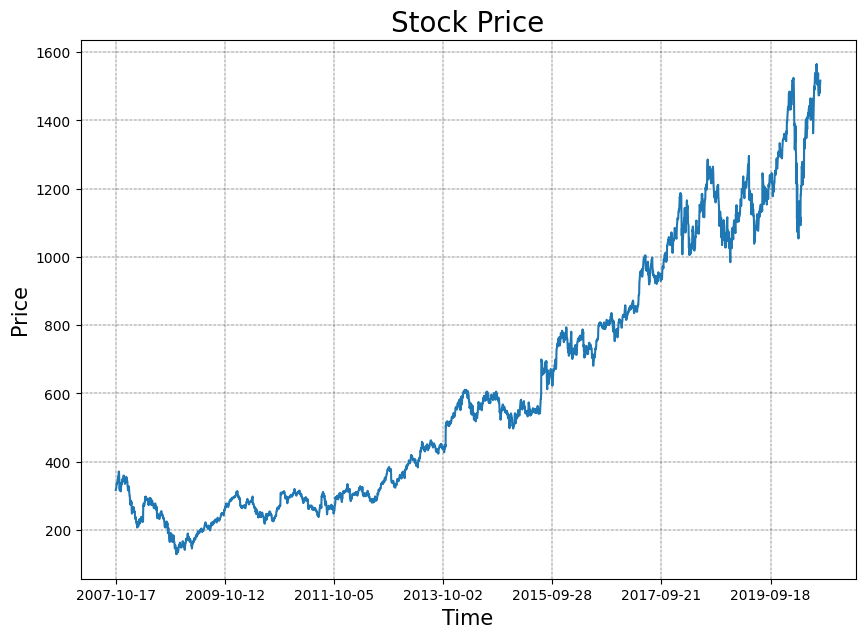

In [6]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=20)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.grid(which="major", color='black', linestyle='-.', linewidth=0.3)
plt.show()

In [7]:
df_Stock = df_Stock.drop(columns='Date_col')

In [8]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close'], axis=1)
    target = df_Stock['Close']


    data_length = df_Stock.shape[0]
    print('Stock Data length is - ', str(data_length))


    train_split = int(data_length * 0.75)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_length * 0.2)
    print('Validation Set length - ', str(int(data_length * 0.2)))

    print('Test Set length - ', str(int(data_length * 0.02)))


    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]


    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [9]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Stock Data length is -  3229
Training Set length -  2421
Validation Set length -  645
Test Set length -  64
(2421, 61) (645, 61) (163, 61)
(2421,) (645,) (163,)


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-7.89417566e-03  1.81545404e-02  1.67894454e-02  4.49043964e-09
  1.23902917e-04  3.02258298e-03  2.52697271e-03 -5.56634987e-01
 -3.02134983e-01 -1.23211573e-01 -1.24435587e-01  5.76094180e-03
 -8.27804812e-01 -5.10195968e-01  2.77477702e-03 -5.72313910e-02
 -3.45943661e-03  6.92478318e-01  6.92478318e-01  6.92478318e-01
  6.92478318e-01  6.92478318e-01  3.74690897e-01 -4.83641150e-01
 -2.12519752e-02 -2.09002617e-03 -9.22998900e-11 -1.17496359e-03
  1.73001490e-03  1.11628659e-03  1.11628660e-03 -3.03524704e-01
  5.33901756e-10 -2.53216892e-12  5.91784410e-03 -8.37318442e-03
 -5.60434070e-03  1.09820031e-03  2.25950272e-02  9.55470107e-03
 -7.49956318e-02  9.14076133e-03  4.11178424e-02  2.35922393e-16
  2.59323280e-05 -3.78910208e-02  1.65619949e-01  1.12379045e-01
 -1.08721097e-01  5.28759930e-03 -8.06897871e-03  1.80832276e-02
 -5.51600298e-02  4.64848036e-02 -1.12905855e-03  9.31603661e-04
  3.32431986e-04 -9.10430427e-05 -4.56676882e-05  8.59975895e-05
  1.41

In [12]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9999972342846037


In [13]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [15]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.07
Training Mean Squared Error: 0.12
Training RMSE:  0.34
Training MAE:  0.25
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.06
Validation Mean Squared Error: 0.12
Validation RMSE:  0.85
Validation MAE:  0.65
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 0.08
Test Mean Squared Error: 2.08
Test RMSE:  1.44
Test MAE:  1.1


In [16]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2017-05-31 00:00:00,987.09,987.890178
1,2017-06-01 00:00:00,988.29,988.595461
2,2017-06-02 00:00:00,996.12,996.074243
3,2017-06-05 00:00:00,1003.88,1003.985537
4,2017-06-06 00:00:00,996.68,996.918565
...,...,...,...
640,2019-12-13 00:00:00,1346.87,1347.851867
641,2019-12-16 00:00:00,1360.70,1361.341244
642,2019-12-17 00:00:00,1354.89,1355.016564
643,2019-12-18 00:00:00,1351.91,1351.959539


<Axes: >

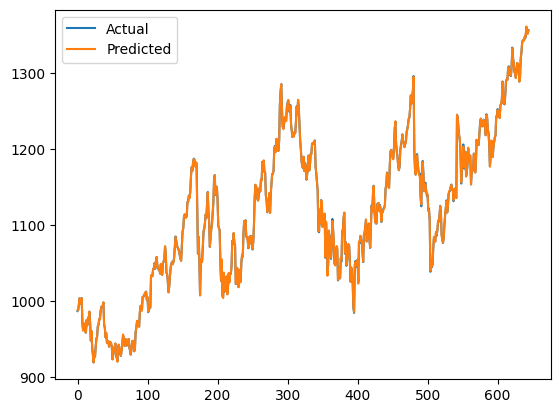

In [17]:
df_pred[['Actual', 'Predicted']].plot()